In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#"Suppose you're working with a cruise company. They want to know if there's a specific group of passengers (based on class, gender, or family size) that had significantly higher survival chances. How would you identify and justify targeting this group for premium safety services?"
#Your task:
            #Use groupby and survival rate analysis across Pclass, Sex, and HasFamily.
            #Identify the group with the highest survival rate.
            #Explain why they might have survived more (based on data).
            #Would you recommend targeting them for enhanced safety services?

In [13]:
data["HasFamily"] = ((data["SibSp"] + data["Parch"]) > 0).astype(int)
group_survival = data.groupby(["Pclass","Sex","HasFamily"])["Survived"].mean()*100
print(group_survival.sort_values(ascending=False))

Pclass  Sex     HasFamily
1       female  0            97.058824
                1            96.666667
2       female  1            93.181818
                0            90.625000
3       female  0            61.666667
1       male    1            42.553191
3       female  1            41.666667
1       male    0            33.333333
2       male    1            27.777778
3       male    1            18.072289
                0            12.121212
2       male    0             9.722222
Name: Survived, dtype: float64


In [ ]:
#Insights :
     #Top group: First-class females with family — almost all survived.
     #Lowest group: Third-class males alone — very few survived.
     #Family presence seems to slightly help survival in most cases.
     #For business or safety planning, you should focus on vulnerable groups (like 3rd class males) for safety training or services — not the already-safe groups.


In [ ]:
#You're building a predictive model for survival. You're allowed to use only 3 features. Which 3 features would you choose from the dataset, and why?"
#Your task:
            #Pick 3 features (e.g., Sex, Pclass, Fare, etc.)
            #Justify each choice based on their correlation with survival.
            #If possible, print survival rates by those features.

In [14]:
print(data.groupby("Sex")["Survived"].mean() * 100)


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [15]:
print(data.groupby("Pclass")["Survived"].mean() * 100)


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [16]:
print(data[["Fare", "Survived"]].corr())


              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000


In [17]:
#I would choose Sex, Pclass, and Fare as my top 3 features:
    #Sex strongly separates survival chances due to rescue priority.
    #Pclass captures socio-economic status and cabin location.
    #Fare gives granularity within Pclass (some 3rd class paid higher fares).

In [19]:
new_data = data[["Pclass","Sex","Fare","Survived"]].copy()

In [27]:
new_data.head(5)

,Pclass,Sex,Fare,Survived
0,3,0,7.2500,0
1,1,1,71.2833,1
2,3,1,7.9250,1
3,1,1,53.1000,1
4,3,0,8.0500,0


In [26]:
new_data["Sex"] = new_data["Sex"].map({"male": 0, "female": 1})

In [34]:
x = new_data.iloc[:,:-1]
y= new_data["Survived"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

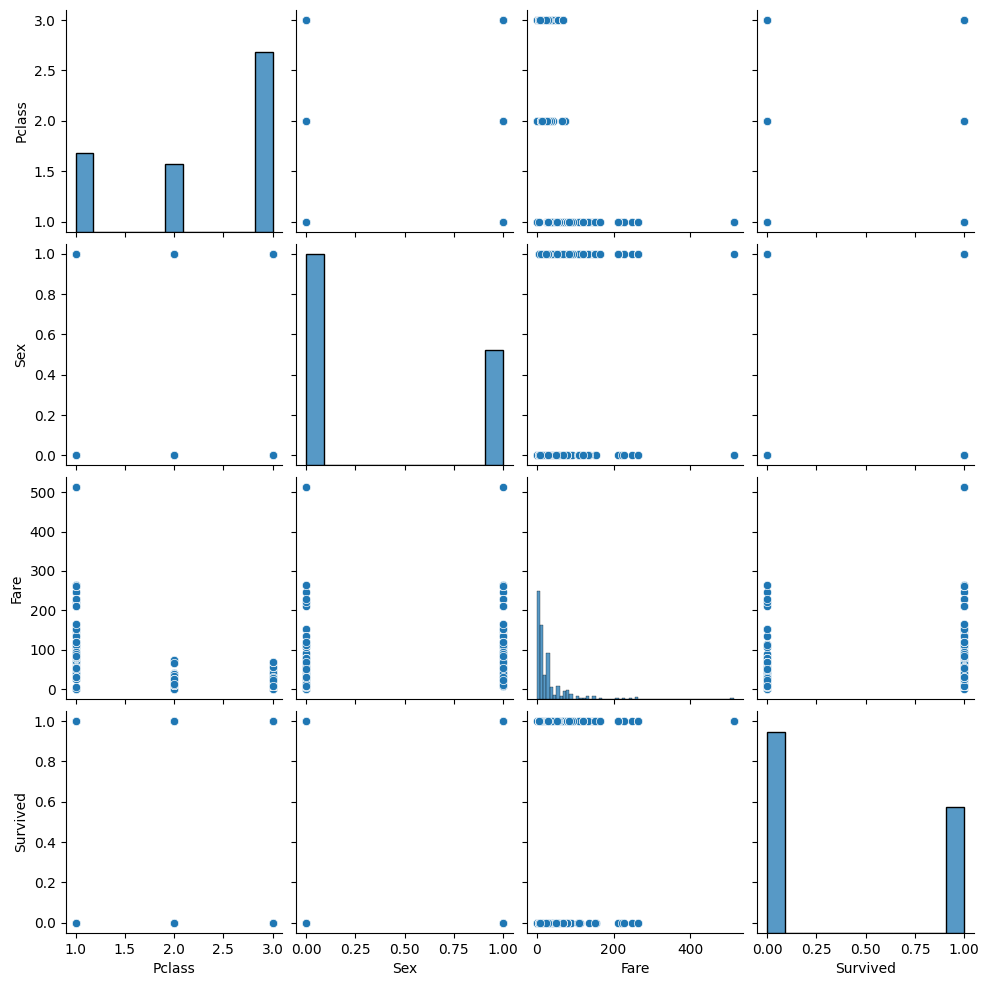

In [37]:
sns.pairplot(data=new_data)
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(78.2122905027933, 79.07303370786516)

In [43]:
lr.predict([[1 ,1 , 53.1000]])

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [44]:
#3	0	7.2500   0  0
#1	1	53.1000  1  1

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test,lr.predict(x_test))

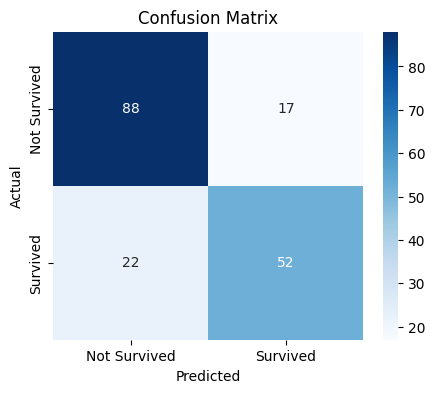

In [50]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()